# Importing Libraries

In [2]:
from bs4 import BeautifulSoup
import requests
from csv import writer
import json

import smtplib # Sending e-mails to yourself

## Creating Request Object

In [491]:
# Connecting to Website
# URL = 'https://www.toctoc.com/resultados/lista/compra/departamento/antofagasta/antofagasta/?moneda=2&precioDesde=0&precioHasta=0&dormitoriosDesde=&dormitoriosHasta=&banosDesde=0&banosHasta=0&estado=0&disponibilidadEntrega=&numeroDeDiasTocToc=0&superficieDesdeUtil=0&superficieHastaUtil=0&superficieDesdeConstruida=0&superficieHastaConstruida=0&superficieDesdeTerraza=0&superficieHastaTerraza=0&superficieDesdeTerreno=0&superficieHastaTerreno=0&ordenarPor=0&pagina=1&paginaInterna=1&zoom=15&idZonaHomogenea=0&atributos=&texto=Antofagasta&viewport=&idPoligono=331&publicador=0&temporalidad=0'
# URL = 'https://www.toctoc.com/resultados/mapa/compra/departamento/antofagasta/antofagasta/?moneda=2&precioDesde=0&precioHasta=0&dormitoriosDesde=&dormitoriosHasta=&banosDesde=0&banosHasta=0&estado=0&disponibilidadEntrega=&numeroDeDiasTocToc=0&superficieDesdeUtil=0&superficieHastaUtil=0&superficieDesdeConstruida=0&superficieHastaConstruida=0&superficieDesdeTerraza=0&superficieHastaTerraza=0&superficieDesdeTerreno=0&superficieHastaTerreno=0&ordenarPor=0&pagina=1&paginaInterna=1&zoom=7.881456275959914&idZonaHomogenea=0&atributos=&texto=Antofagasta&viewport=-24.679021029731246,-70.95368684022556,-22.86171656820659,-69.60889726720892&idPoligono=331&publicador=0&temporalidad=0'
URL = 'https://chilepropiedades.cl/propiedades/venta/departamento/antofagasta/0'
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"}


page = requests.get(URL, headers=headers)

# Reading Website
soup = BeautifulSoup(page.content, "html.parser")
soup2 = soup.prettify()

## Reading data

In [492]:
# all_data = soup.find_all('script', {"type": "application/json"})
all_data = soup.find_all('div', {'class':'clp-publication-element-description-container'})
all_data

[<div class="clp-publication-element-description-container">
 <div class="d-flex">
 <div class="flex-1">
 <h2 class="publication-title-list">
 <a href="/ver-publicacion/venta/antofagasta/estudio/aconcagua-965/4928907">
                 Antofagasta, Aconcagua 965
                 
               </a>
 </h2>
 <a class="d-block text-ellipsis clp-big-value" href="/ver-publicacion/venta/antofagasta/estudio/aconcagua-965/4928907">
 <span areaunit="" class="clp-value-container" data-no-value="" valueunit="3">
                     UF
                   </span>
 <span areaunit="" class="clp-value-container" data-no-value-unit="" value="2600.0" valueunit="3">
                     2.600
                   </span>
 </a>
 </div>
 </div>
 <div>
 <div class="clp-publication-features-container">
 <span title="Baños">
 <svg class="clp-icon-size-0 clp-icon clp-bathrooms" id="svg148" viewbox="0 0 24 24" x="0px" y="0px">
 <g fill="currentColor" transform="matrix(0.38734985,0,0,0.42050809,16.032391,-400.38

### Get the number of web pages

In [493]:
num_pages = soup.find_all('span', {'class':'light-bold'})[2].text.strip()
num_pages = num_pages.split()[-1]
num_pages = int(num_pages)
num_pages

13

### Extracting Price

In [494]:
# 1st Value
all_data[0].find('a',{'class':'d-block text-ellipsis clp-big-value'}).text.replace('\n',"").replace(" ","")

'UF2.600'

In [500]:
## ALL Prices
for item in soup.find_all('a',{'class':'d-block text-ellipsis clp-big-value'}):
    print(item.text.replace("\n","").replace(" ",""))

UF2.600
UF5.100
UF6.500
UF4.900
UF14.200
UF13.800
UF4.700
UF6.500
UF2.600
UF3.600


## Beds

In [238]:
## 1st Value
all_beds = soup.find_all('span', {'title':'Habitaciones'})
int(all_beds[0].find('span', {'class':'clp-feature-value'}).text)

3

In [259]:
## ALL Beds
for n_beds in soup.find_all('span', {'title':'Habitaciones'}):
    print(" N° of Beds:" ,int(n_beds.find('span', {'class':'clp-feature-value'}).text))

 N° of Beds: 3
 N° of Beds: 3
 N° of Beds: 3
 N° of Beds: 2
 N° of Beds: 1
 N° of Beds: 1
 N° of Beds: 3
 N° of Beds: 1
 N° of Beds: 3


## Bathrooms

In [270]:
# 1st Value
all_baths = soup.find_all('span', {'title':'Baños'})
all_baths[0].find('span', {'class':'clp-feature-value'}).text

'1'

In [273]:
## ALL Baths
for n_baths in soup.find_all('span', {'title':'Baños'}):
    print(" N° of Bathrooms:" ,int(n_baths.find('span', {'class':'clp-feature-value'}).text))

 N° of Bathrooms: 1
 N° of Bathrooms: 2
 N° of Bathrooms: 2
 N° of Bathrooms: 2
 N° of Bathrooms: 2
 N° of Bathrooms: 1
 N° of Bathrooms: 1
 N° of Bathrooms: 2
 N° of Bathrooms: 1
 N° of Bathrooms: 2


## Area [m2]

In [291]:
#1st Value
float(soup.find_all('span', {'title':'Superficie Total'})[0].text.split(" ")[0].replace(",","."))

29.3

In [307]:
# ALl Values
for area in soup.find_all('span', {'title':'Superficie Total'}) :
    print("Area [m2]:" , float(area.text.split(" ")[0].replace(",",".")) )

Area [m2]: 29.3
Area [m2]: 92.0
Area [m2]: 103.0
Area [m2]: 78.0
Area [m2]: 4.344
Area [m2]: 48.0
Area [m2]: 109.0
Area [m2]: 53.0
Area [m2]: 107.0


## Address

In [380]:
# 1st Address
soup.find_all('h2', {'class':'publication-title-list'} )[0].text.replace("\n","").replace(" ","")

'Antofagasta,Aconcagua965'

In [381]:
# All Addresses
for address in soup.find_all('h2', {'class':'publication-title-list'}) :
    print( address.text.replace("\n","").replace(" ","") )

Antofagasta,Aconcagua965
Antofagasta,Cap.CarlosCondell2026
Antofagasta,Av.CerroParanal515
Antofagasta,LidiaMoreno
Antofagasta,MarioBahamondesSilva02855PublicaciónReciente
Antofagasta,GalleguillosLorca1882PublicaciónReciente
Antofagasta,PrimeraLinea/AvenidaAngamos/2Dormitorios/2Baños/Estacionamiento/BodegaPublicaciónReciente
Antofagasta,CerroParanalconCostaneraPublicaciónReciente
Antofagasta,EdificioActivo/1ambiente/estacionamiento/bodegaPublicaciónReciente
Antofagasta,EdificioCentroNuevo


## Parking

In [411]:
# 1st Value
parking = soup('span', {'title':'Estacionamientos'})
int(parking[0].find('span', {'class':'clp-feature-value'}).text)

1

In [427]:
# Parkings
for parking in soup.find_all('span', {'title':'Estacionamientos'}) :
    print("Parkings :", int(parking.find('span', {'class':'clp-feature-value'}).text) )

Parkings : 1
Parkings : 1
Parkings : 1
Parkings : 2
Parkings : 2
Parkings : 1
Parkings : 1


## Search Department Only

In [501]:
# soup.find_all('h3', {'class':'sub-codigo-data'})[3].text.replace(" / ",""):
for item in soup.find_all('h3', {'class':'sub-codigo-data'}):
    print(item.text.replace(" ","").split("/")[1])

Estudio
Departamento
Departamento
Departamento
Departamento
Departamento
Departamento
Departamento
Departamento
Departamento


# All Data

In [477]:
l = []
for page in range(num_pages):
    URL = 'https://chilepropiedades.cl/propiedades/venta/departamento/antofagasta/'+str(page)
    page = requests.get(URL, headers=headers)
    soup = BeautifulSoup(page.content, "html.parser")
    all_data = soup.find_all('div', {'class':'clp-publication-element-description-container'})
    for data in all_data:
        d = {}

    #     # Check if its Department
        dpto = data.find_all('h3', {'class':'sub-codigo-data'})
        dpto = dpto[0].text.replace(" ","").split("/")[1]
        if "Departamento" in dpto:
            
            # Addresses
            address = data.find_all('h2', {'class':'publication-title-list'} )[0].text.replace("\n","").replace(" ","")
            d['Address'] = address

            # NUMBERS OF BEDS
            try:
                beds = data.find_all('span', {'title':'Habitaciones'})
                d['Beds'] = int(beds[0].find('span', {'class':'clp-feature-value'}).text)
            except:
                d['Beds'] = None

            # NUMBERS OF BATHROOMS
            try:
                baths = data.find_all('span', {'title':'Baños'})
                d['Baths'] = int(baths[0].find('span', {'class':'clp-feature-value'}).text)
            except:
                d['Baths'] = None

            # Area
            area = data.find_all('span', {'title':'Superficie Total'})
            try:
                d['Area'] = float( area[0].text.split(" ")[0].replace(",",".") ) 
            except:
                d['Area'] = None

            # Parkings

            try:
                parking = data('span', {'title':'Estacionamientos'})
                d['Parking'] = int(parking[0].find('span', {'class':'clp-feature-value'}).text)
            except:
                d['Parking'] = 0
                
            # PRICES
            price = data.find_all('a',{'class':'d-block text-ellipsis clp-big-value'})
            d['Price'] =  price[0].text.replace('\n',"").replace(" ","")

            l.append(d)

### Data to DataFrame

In [478]:
l

[{'Address': 'Antofagasta,Cap.CarlosCondell2026',
  'Beds': 3,
  'Baths': 2,
  'Area': 92.0,
  'Parking': 1,
  'Price': 'UF5.100'},
 {'Address': 'Antofagasta,Av.CerroParanal515',
  'Beds': 3,
  'Baths': 2,
  'Area': 103.0,
  'Parking': 1,
  'Price': 'UF6.500'},
 {'Address': 'Antofagasta,LidiaMoreno',
  'Beds': 3,
  'Baths': 2,
  'Area': None,
  'Parking': 1,
  'Price': 'UF4.900'},
 {'Address': 'Antofagasta,MarioBahamondesSilva02855PublicaciónReciente',
  'Beds': 3,
  'Baths': 2,
  'Area': 240.0,
  'Parking': 2,
  'Price': 'UF14.200'},
 {'Address': 'Antofagasta,GalleguillosLorca1882PublicaciónReciente',
  'Beds': 5,
  'Baths': 2,
  'Area': 240.0,
  'Parking': 2,
  'Price': 'UF13.800'},
 {'Address': 'Antofagasta,PrimeraLinea/AvenidaAngamos/2Dormitorios/2Baños/Estacionamiento/BodegaPublicaciónReciente',
  'Beds': 2,
  'Baths': 2,
  'Area': 93.0,
  'Parking': 0,
  'Price': 'UF4.700'},
 {'Address': 'Antofagasta,CerroParanalconCostaneraPublicaciónReciente',
  'Beds': 2,
  'Baths': 2,
  'Area

In [716]:
import pandas as pd
import numpy as np

In [677]:
df = pd.DataFrame(l)

In [678]:
df.head()

,Address,Beds,Baths,Area,Parking,Price
0,"Antofagasta,Cap.CarlosCondell2026",3.0,2.0,92.0,1,UF5.100
1,"Antofagasta,Av.CerroParanal515",3.0,2.0,103.0,1,UF6.500
2,"Antofagasta,LidiaMoreno",3.0,2.0,NaN,1,UF4.900
3,"Antofagasta,MarioBahamondesSilva02855Publicaci...",3.0,2.0,240.0,2,UF14.200
4,"Antofagasta,GalleguillosLorca1882PublicaciónRe...",5.0,2.0,240.0,2,UF13.800


In [679]:
clp_to_uf = 35256.82

def to_uf(x):
    
    if "$" in x:
        return (  int( float((x[1:]).replace(".","")) / clp_to_uf)  )
        
    elif "USD" in x:
        return ( int ((x[3:]).replace(".","")) )
        
    else:
        return ( int ((x[2:]).replace(".","")) )

In [680]:
df['Price'] = df['Price'].apply(to_uf)

In [681]:
df.head(10)

,Address,Beds,Baths,Area,Parking,Price
0,"Antofagasta,Cap.CarlosCondell2026",3.0,2.0,92.000,1,5100
1,"Antofagasta,Av.CerroParanal515",3.0,2.0,103.000,1,6500
2,"Antofagasta,LidiaMoreno",3.0,2.0,NaN,1,4900
3,"Antofagasta,MarioBahamondesSilva02855Publicaci...",3.0,2.0,240.000,2,14200
4,"Antofagasta,GalleguillosLorca1882PublicaciónRe...",5.0,2.0,240.000,2,13800
5,"Antofagasta,PrimeraLinea/AvenidaAngamos/2Dormi...",2.0,2.0,93.000,0,4700
6,"Antofagasta,CerroParanalconCostaneraPublicació...",2.0,2.0,78.000,1,6500
7,"Antofagasta,EdificioActivo/1ambiente/estaciona...",1.0,1.0,4.344,0,2600
8,"Antofagasta,EdificioCentroNuevo",1.0,1.0,48.000,1,3600
9,"Antofagasta,Condominiovientosdelsur",3.0,2.0,109.000,2,4538


In [682]:
import matplotlib.pyplot as plt
import seaborn as sns

In [693]:
data = df.copy()

In [694]:
data.isna().sum()

Address    0
Beds       3
Baths      4
Area       9
Parking    0
Price      0
dtype: int64

In [701]:
data = data.dropna()

<AxesSubplot:xlabel='Area', ylabel='Price'>

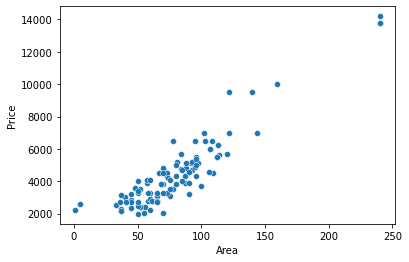

In [702]:
sns.scatterplot(data=df, x='Area', y='Price')

# Linear Regression Model

In [703]:
from sklearn.model_selection import train_test_split

In [705]:
X = data.drop(['Address','Price'], axis=1)
y = data['Price']

In [706]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [707]:
X_train

,Beds,Baths,Area,Parking
31,3.0,2.0,100.0,1
44,1.0,1.0,1.0,1
6,2.0,2.0,78.0,1
57,3.0,2.0,90.0,1
119,3.0,2.0,85.0,1
...,...,...,...,...
76,3.0,2.0,108.0,2
15,5.0,4.0,159.0,2
100,3.0,2.0,90.0,1
55,3.0,1.0,61.0,1


### Creating Model

In [708]:
from sklearn.linear_model import LinearRegression

In [709]:
model = LinearRegression()

In [713]:
model.fit(X_train,y_train)

LinearRegression()

### Predicts

In [719]:
y_pred = model.predict(X_test)

In [720]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [721]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [722]:
print("MAE :", MAE)
print("MSE :", MSE)
print("RMSE :", RMSE)

MAE : 681.1089351952737
MSE : 787160.2937933245
RMSE : 887.2205440550418


In [724]:
# Residuals
test_res = y_test - y_pred

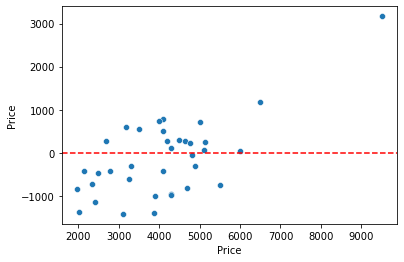

In [725]:
sns.scatterplot(x=y_test, y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

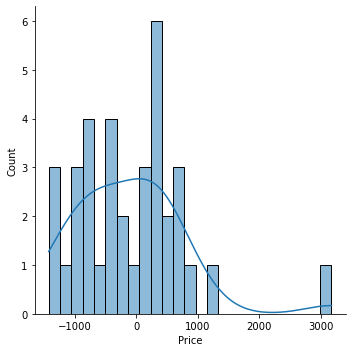

In [727]:
sns.displot(test_res,bins=25,kde=True)